In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import sys
import json

%matplotlib inline

In [2]:
from pyPPG import PPG, Fiducials, Biomarkers
from pyPPG.datahandling import load_data, plot_fiducials, save_data
import pyPPG.preproc as PP # for signals processing
import pyPPG.fiducials as FP # for geting fiducial points
import pyPPG.biomarkers as BM
import pyPPG.ppg_sqi as SQI


### pre_final_code

first insight !!

In [3]:
# Load the raw PPG signal
datapath = "PPG_Dataset/RawCSV/signal_01_0001.csv"
start_sig = 0
end_sig = -1
signal = load_data(data_path=datapath, start_sig=start_sig, end_sig=end_sig, use_tk=False)
signal.fs = 2175

In [4]:
# first insight
len(signal.v)/signal.fs # the signals is 10 sec each with sampling frequency 2175 Hz.

10.068965517241379

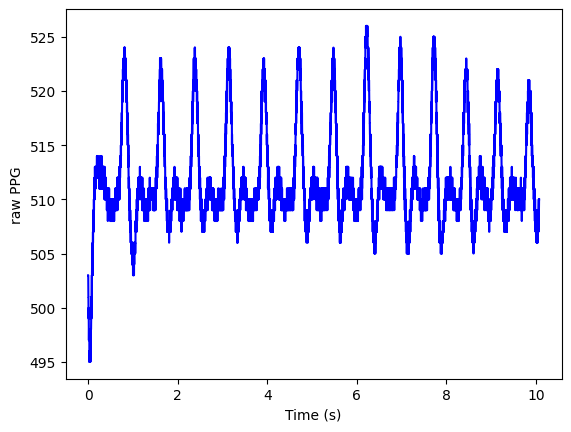

In [5]:
# setup figure
fig, ax = plt.subplots()

# create time vector
t = np.arange(0, len(signal.v))/signal.fs

# plot raw PPG signal
ax.plot(t, signal.v, color = 'blue')
ax.set(xlabel = 'Time (s)', ylabel = 'raw PPG')

# show plot
plt.show()


In [6]:
# down sampling
df = pd.read_csv("PPG_Dataset/RawCSV/signal_01_0001.csv")
df.iloc[75]

signal    495
Name: 75, dtype: int64

In [7]:
df = df[df.index%15 == 0] #indexing each one in 15 sample
df.index = np.arange(0, len(df)) # reset the index
df.head(10)

,signal
0,503
1,501
2,498
3,497
4,497
5,495
6,495
7,495
8,498
9,498


In [8]:
df.to_csv("PPG_Dataset/DownSampling/test_0.csv", index= False)

In [9]:
data_path = "PPG_Dataset/DownSampling/test_0.csv"
start_sig = 0
end_sig = -1
signal_T = load_data(data_path=data_path, start_sig=start_sig, end_sig=end_sig, use_tk=False)
signal_T.fs = 145

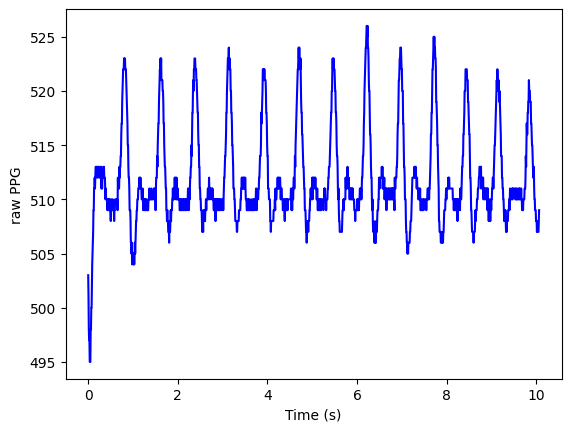

In [10]:
# import plotting package
from matplotlib import pyplot as plt

# setup figure
fig, ax = plt.subplots()

# create time vector
t = np.arange(0, len(signal_T.v))/signal_T.fs

# plot raw PPG signal
ax.plot(t, signal_T.v, color = 'blue')
ax.set(xlabel = 'Time (s)', ylabel = 'raw PPG')

# show plot
plt.show()


In [11]:
signal.fs

2175

In [12]:
signal_T.fs

145

note it possible to down sampling the freq. to 15:1 (145 Hz) 

### geting the ppg, ppg', ppg'', ppg''' signals
<br>
<br>

In [13]:
# filtering the ppg signals and get vpg, apg and jpg

#initializing the parameter of signal processing
signal.filtering = True
signal_T.filtering = True


signal.fL=0.5000001 # same for Test signals
signal_T.fL=0.5000001 # same for Test signals

signal.fH=12*15 # Upper cutoff frequency (Hz)
signal_T.fH=12 # same for Test signals 

signal.order=4 # Filter order
signal_T.order=4 # same for Test signals

signal.sm_wins={'ppg':50,'vpg':10,'apg':10,'jpg':10} # smoothing windows in millisecond for the PPG, PPG', PPG", and PPG'"
signal_T.sm_wins={'ppg':50,'vpg':10,'apg':10,'jpg':10} # same for Test signals

# processing and culc the ppg, ppg', ppg'', ppg'''
prep = PP.Preprocess(fL=signal.fL, fH=signal.fH, order=signal.order, sm_wins=signal.sm_wins)
prep_T = PP.Preprocess(fL=signal_T.fL, fH=signal_T.fH, order=signal_T.order, sm_wins=signal_T.sm_wins) 

# the ppg, ppg', ppg'', ppg'''
signal.ppg, signal.vpg, signal.apg, signal.jpg = prep.get_signals(s=signal)
signal_T.ppg, signal_T.vpg, signal_T.apg, signal_T.jpg = prep_T.get_signals(s=signal_T)

In [14]:
signal.ppg

array([-0.14744035, -0.25193549, -0.35637375, ...,  2.99271412,
        3.03275126,  3.07278522])

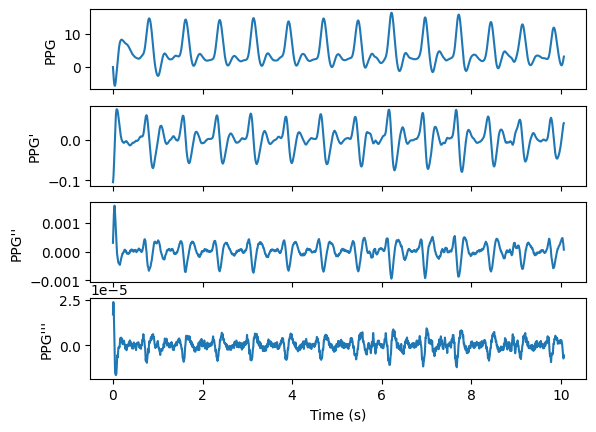

In [15]:
# setup figure
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False)

# create time vector
t = np.arange(0, len(signal.ppg))/signal.fs

# plot filtered PPG signal
ax1.plot(t, signal.ppg)
ax1.set(xlabel = '', ylabel = 'PPG')

# plot first derivative
ax2.plot(t, signal.vpg)
ax2.set(xlabel = '', ylabel = 'PPG\'')

# plot second derivative
ax3.plot(t, signal.apg)

ax3.set(xlabel = '', ylabel = 'PPG\'\'')

# plot third derivative
ax4.plot(t, signal.jpg)
ax4.set(xlabel = 'Time (s)', ylabel = 'PPG\'\'\'')

# show plot
plt.show()

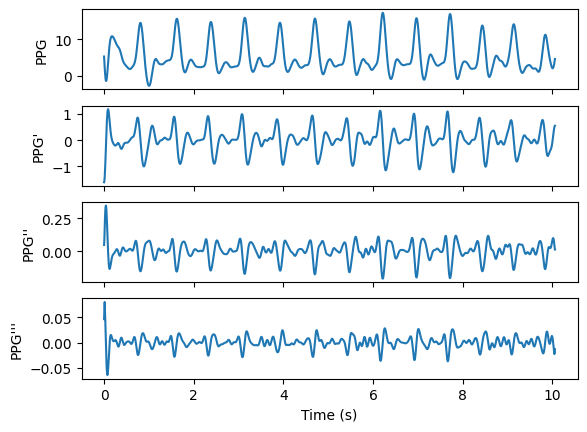

In [16]:
# setup figure
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, 1, sharex = True, sharey = False)

# create time vector
t = np.arange(0, len(signal_T.ppg))/signal_T.fs

# plot filtered PPG signal
ax1.plot(t, signal_T.ppg)
ax1.set(xlabel = '', ylabel = 'PPG')

# plot first derivative
ax2.plot(t, signal_T.vpg)
ax2.set(xlabel = '', ylabel = 'PPG\'')

# plot second derivative
ax3.plot(t, signal_T.apg)
ax3.set(xlabel = '', ylabel = 'PPG\'\'')

# plot third derivative
ax4.plot(t, signal_T.jpg)
ax4.set(xlabel = 'Time (s)', ylabel = 'PPG\'\'\'')

# show plot
plt.show()

In [17]:
# get a Datafram containing ppg, ppg', ppg'', ppg'''
lst = []
for arr in [signal.ppg, signal.vpg, signal.apg, signal.jpg]:
    arr = arr[np.newaxis, :] # convert 1D to 2D
    arr = arr.T # transpose the array
    df = pd.DataFrame(arr)
    lst.append(df)
df_PPG = pd.concat(lst, axis=1)
df_PPG.columns = ["ppg", "vpg", "apg", "jpg"]    

In [18]:
df_PPG

,ppg,vpg,apg,jpg
0,-0.147440,-0.104495,0.000303,0.000017
1,-0.251935,-0.104192,0.000320,0.000017
2,-0.356374,-0.103885,0.000337,0.000018
3,-0.460700,-0.103573,0.000355,0.000018
4,-0.564866,-0.103251,0.000372,0.000019
...,...,...,...,...
21895,2.912625,0.039765,0.000088,-0.000006
21896,2.952672,0.039836,0.000082,-0.000006
21897,2.992714,0.039903,0.000076,-0.000006
21898,3.032751,0.039969,0.000070,-0.000006


### geting the fiducial points
<br>
<br>

In [19]:
# Initialise the correction for fiducial points
corr_on = ['on', 'dn', 'dp', 'v', 'w', 'f']
correction=pd.DataFrame()
correction.loc[0, corr_on] = True
signal.correction=correction

# Create a PPG class
s = PPG(signal) # note: we change the source code at C:\Users\10\anaconda3\envs\PPGenv\Lib\site-packages\pyPPG\pack_ppg
#from >= fs*15 to from >= fs*10 so it can accept signals less than 15 sec.

In [20]:
# Initialise the fiducials package
fpex = FP.FpCollection(s=s)

In [21]:
# Extract fiducial points
fiducials = fpex.get_fiducials(s=s)

In [22]:
print("Fiducial points:\n",fiducials + s.start_sig) # here the starting sample is added so that the results are relative to the start of the original signal (rather than the start of the analysed segment)

Fiducial points:
                    on     sp     dn     dp    off      u      v      w      a  \
Index of pulse                                                                  
0                   0    422    972    609   1244    187    531    609     76   
1                1244   1761   2189   2509   3181   1631   1941   2335   1537   
2                3181   3530   3923   4217   4591   3404   3692   3863   3312   
3                4591   5184   5583   5731   6207   5047   5332   5515   4933   
4                6207   6828   7228   7525   7922   6690   6980   7161   6602   
5                7922   8529   8914   9035   9545   8395   8680   9034   8314   
6                9545  10230  10633  10764  11241  10093  10386  10597  10001   
7               11241  11908  12258  12583  13021  11766  12066  12344  11653   
8               13021  13527  13917  14219  14662  13405  13673  13900  13302   
9               14662  15162  15527  15844  16189  15048  15305  15663  14954   
10        

In [23]:
df_fid = pd.DataFrame(fiducials + s.start_sig)

In [24]:
df_fid

,on,sp,dn,dp,off,u,v,w,a,b,c,d,e,f,p1,p2
Index of pulse,,,,,,,,,,,,,,,,
0,0,422,972,609,1244,187,531,609,76,331,458,468,581,617,352,465
1,1244,1761,2189,2509,3181,1631,1941,2335,1537,1744,2044,2120,2194,2451,1761,2106
2,3181,3530,3923,4217,4591,3404,3692,3863,3312,3525,3796,3809,3840,3863,3550,3803
3,4591,5184,5583,5731,6207,5047,5332,5515,4933,4947,4959,5180,5487,5515,5001,5161
4,6207,6828,7228,7525,7922,6690,6980,7161,6602,6822,7005,7010,7135,7161,6846,6951
5,7922,8529,8914,9035,9545,8395,8680,9034,8314,8525,8789,8801,8877,9049,8546,8795
6,9545,10230,10633,10764,11241,10093,10386,10597,10001,10223,10483,10497,10527,10597,10242,10491
7,11241,11908,12258,12583,13021,11766,12066,12344,11653,11685,11695,11914,12212,12386,11689,11895
8,13021,13527,13917,14219,14662,13405,13673,13900,13302,13321,13336,13518,13865,13900,13324,13493


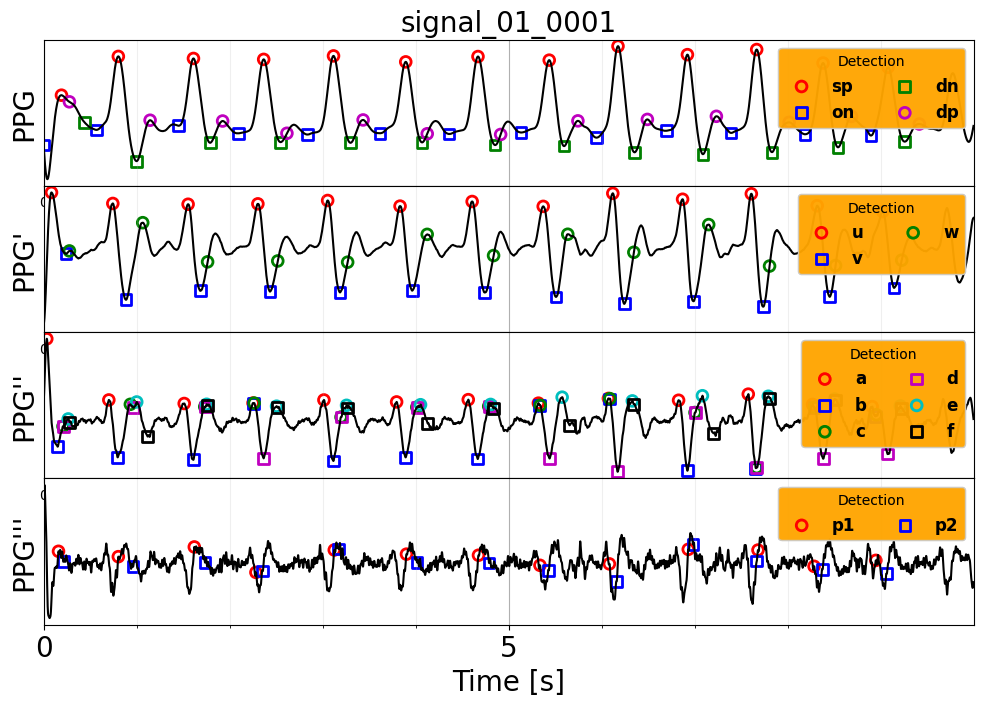

Figure has been saved in the "temp_dir\PPG_Figures\".


In [25]:
# Create a fiducials class
fp = Fiducials(fp=fiducials)

# Plot fiducial points
plot_fiducials(s, fp, legend_fontsize=12)

### For the downed sampled signal 

In [26]:
# Initialise the correction for fiducial points
corr_on = ['on', 'dn', 'dp', 'v', 'w', 'f']
correction=pd.DataFrame()
correction.loc[0, corr_on] = True
signal_T.correction=correction

# Create a PPG class
s_t = PPG(signal_T) # note: we change the source code at C:\Users\10\anaconda3\envs\PPGenv\Lib\site-packages\pyPPG\pack_ppg
#from >= fs*15 to from >= fs*10 so it can accept signals less than 15 sec.

In [27]:
# Initialise the fiducials package
fpex = FP.FpCollection(s=s_t)

In [28]:
# Extract fiducial points
fiducials = fpex.get_fiducials(s=s_t)
print("Fiducial points:\n",fiducials + s.start_sig)

Fiducial points:
                   on    sp    dn    dp   off     u     v     w     a     b  \
Index of pulse                                                               
0                  0    26    63    45    83    13    36    45     5    17   
1                 83   118   146   156   186   109   128   155   102   117   
2                186   236   262   281   311   227   245   269   220   234   
3                311   346   371   381   412   336   356   380   329   344   
4                412   455   482   502   530   446   464   491   439   454   
5                530   569   594   604   638   560   578   603   551   569   
6                638   682   709   717   749   674   691   716   666   681   
7                749   794   817   839   867   785   804   823   777   793   
8                867   902   928   938   970   893   910   937   887   901   
9                970  1011  1035  1056  1080  1003  1020  1045   996  1010   
10              1080  1120  1143  1152  1191  

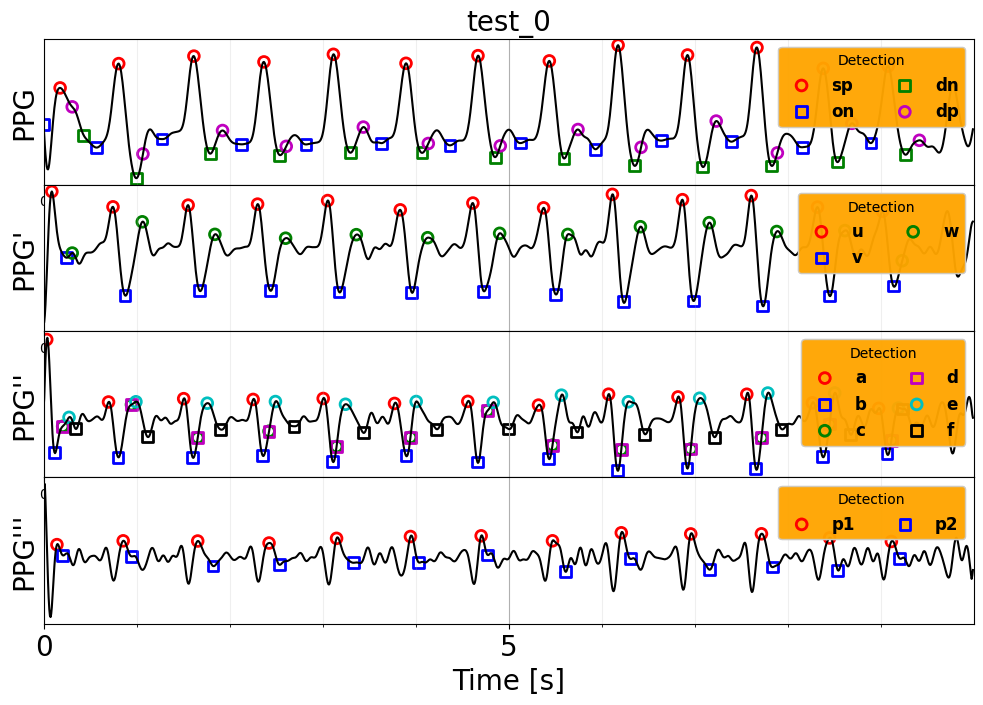

Figure has been saved in the "temp_dir\PPG_Figures\".


In [29]:
# Create a fiducials class
fp = Fiducials(fp=fiducials)

# Plot fiducial points
plot_fiducials(s_t, fp, legend_fontsize=12);

#### as we can see cleary the down sampled data have more precise


### seting up input parameters

In [54]:
def pyppg_proc(datapath, fs, start_sig=0, end_sig=-1, FL=0.5000001
              ,FH=12):
    # Load the raw PPG signal
    datapath = datapath
    start_sig = start_sig
    end_sig = end_sig
    signal = load_data(data_path=datapath, start_sig=start_sig, end_sig=end_sig, use_tk=False)
    signal.fs = fs
    
    # filtering the ppg signals and get vpg, apg and jpg

    #initializing the parameter of signal processing
    signal.filtering = True


    signal.fL=FL # same for Test signals

    signal.fH=FH # Upper cutoff frequency (Hz)


    signal.order=4 # Filter order

    signal.sm_wins={'ppg':50,'vpg':10,'apg':10,'jpg':10} # smoothing windows in millisecond for the PPG, PPG', PPG", and PPG'"
    
    # processing and culc the ppg, ppg', ppg'', ppg'''
    prep = PP.Preprocess(fL=signal.fL, fH=signal.fH, order=signal.order, sm_wins=signal.sm_wins)
    

    # the ppg, ppg', ppg'', ppg'''
    signal.ppg, signal.vpg, signal.apg, signal.jpg = prep.get_signals(s=signal)
    # get a Datafram containing ppg, ppg', ppg'', ppg'''

    lst = []
    for arr in [signal.ppg, signal.vpg, signal.apg, signal.jpg]:
        arr = arr[np.newaxis, :] # convert 
        arr = arr.T # transpose the array
        df = pd.DataFrame(arr)
        lst.append(df)
    df_PPG = pd.concat(lst, axis=1)
    df_PPG.columns = ["ppg", "vpg", "apg", "jpg"]    


    # Initialise the correction for fiducial points
    corr_on = ['on', 'dn', 'dp', 'v', 'w', 'f']
    correction=pd.DataFrame()
    correction.loc[0, corr_on] = True
    signal.correction=correction

    # Create a PPG class
    s = PPG(signal) # note: we change the source code at C:\Users\10\anaconda3\envs\PPGenv\Lib\site-packages\pyPPG\pack_ppg
    #from >= fs*15 to from >= fs*10 so it can accept signals less than 15 sec.
    # Initialise the fiducials package
    fpex = FP.FpCollection(s=s)
    fiducials = fpex.get_fiducials(s=s)
    df_fid = pd.DataFrame(fiducials + s.start_sig)
    return df_PPG, df_fid

In [55]:
path = "PPG_Dataset/DownSampling/Raw_PPG_ds"
fid_dir = "PPG_Dataset/DownSampling/Fiducial_ds"
ppg_dir = "PPG_Dataset/DownSampling/PPG_ds"

def dirppg(path, fid_dir, ppg_dir):
    dirc = os.listdir(path)
    for drc in dirc:
        if ".csv" in drc:
            sig_path = path +"/"+ drc #the path for each signal in raw signals dirctory
            df_PPG, df_fid = pyppg_proc(sig_path, fs=145, FH = 12)
            df_fid.to_csv(fid_dir+"/fiducials_"+drc, index= False)
            df_PPG.to_csv(ppg_dir+"/ppg_"+drc, index = False)
    

#### warning!!!! do not run again and again
<br>
<br>
<br>

In [56]:
# run the function for procissing the signals
dirppg(path, fid_dir, ppg_dir)

## final processing of the data

In [63]:
d_list = []
nan_index = []
counter = 0
for dir in os.listdir("PPG_Dataset/DownSampling/Fiducial_ds"):
    if dir == '.ipynb_checkpoints' :
        continue  
    df = pd.read_csv("PPG_Dataset/DownSampling/Fiducial_ds/"+dir)
    counter+=1
    if df.isnull().values.any():
        print(counter-1)
        nan_index.append(counter-1)
        print(dir)
        continue

In [59]:
d_df = pd.read_csv("PPG_Dataset/DownSampling/Fiducial_ds/fiducials_signal_01_0002.csv")

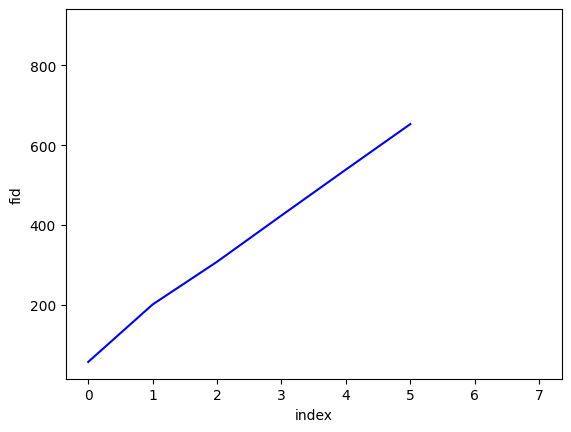

In [60]:
fig, ax = plt.subplots()
ax.plot(d_df.index.values, d_df["w"].values, color = 'blue')
ax.set(xlabel = 'index', ylabel = 'fid')

# show plot
plt.show()


### we can see that fiducial points is lineary distriputed as expected

In [61]:
for dir in os.listdir("PPG_Dataset/DownSampling/Fiducial_ds"):
    if dir == '.ipynb_checkpoints' :
        continue 
    df = pd.read_csv("PPG_Dataset/DownSampling/Fiducial_ds/"+dir)
    if df.isnull().values.any():
        na_coln = df.columns[df.isnull().any()].tolist() # list of columns with null values
        for coln in na_coln:
            # note the interpolate methode don't work with the first element
            df[coln] = df[coln].interpolate(method='linear') # interpolate the missing data
        if df.isnull().values.any(): # check if the first element is null
            na_coln = df.columns[df.isnull().any()].tolist()
            for coln in na_coln:
                last_step = df[coln][1] #initialize to the first element
                step_list = []
                first = True
                step_mean = 0
                for i in df[coln][1:]:
                    if first: # that work only for the first iletration of a loop
                        first = False
                        continue
                    step = i - last_step
                    step_list.append(step)
                    last_step = i
                mean = round(sum(step_list)/len(step_list))
                df.loc[0, coln] = df.loc[1, coln] - mean
        df.to_csv("PPG_Dataset/DownSampling/Fiducial_ds/"+dir, index= False)
            
        continue

['dp']
97
['dp']
120
['dp']
116
['c', 'd', 'f', 'p2']
115
115
117
115


In [68]:
d_list = []
nan_index = []
counter = 0
for dir in os.listdir("PPG_Dataset/DownSampling/Fiducial_ds"):
    if dir == '.ipynb_checkpoints' :
        continue  
    df = pd.read_csv("PPG_Dataset/DownSampling/Fiducial_ds/"+dir)
    counter+=1
    if df.isnull().values.any():
        print(counter-1)
        nan_index.append(counter-1)
        print(dir)    
        continue
if len(nan_index) == 0:
    print("the data is clean \U0001F601")

the data is clean 😁


In [69]:
d_list = []
nan_index = []
counter = 0
for dir in os.listdir("PPG_Dataset/DownSampling/PPG_ds"):
    if dir == '.ipynb_checkpoints' :
        continue  
    df = pd.read_csv("PPG_Dataset/DownSampling/PPG_ds/"+dir)
    counter+=1
    if df.isnull().values.any():
        print(counter-1)
        nan_index.append(counter-1)
        print(dir)    
        continue
if len(nan_index) == 0:
    print("the data is clean \U0001F601")

the data is clean 😁
